In [ ]:
import numpy as np
import matplotlib.pyplot as plt


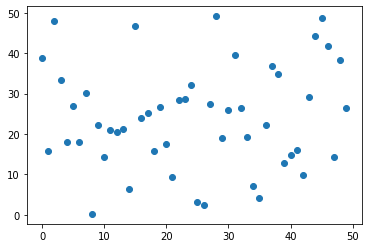

In [ ]:
x1=np.arange(50)
x2=np.random.rand(50)*50
plt.scatter(x1,x2)

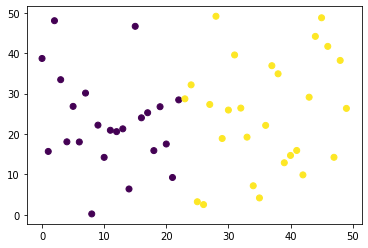

In [ ]:
y=np.where(x1+x1 <=45,0,1)
plt.scatter(x1,x2,c=y)
Y=y

In [ ]:
X=np.hstack([x1.reshape(-1,1),x2.reshape(-1,1)])

In [ ]:
X.shape,y.shape

((50, 2), (50,))

In [ ]:
from sklearn.svm import SVC
model=SVC()

In [ ]:
model.fit(X,y)

SVC()

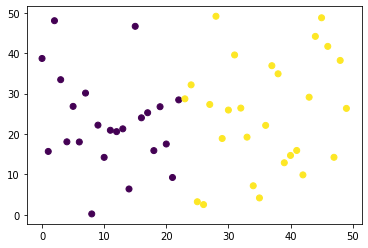

In [ ]:
plt.scatter(x1,x2,c=model.predict(X))

In [ ]:
from mlxtend.plotting import plot_decision_regions

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


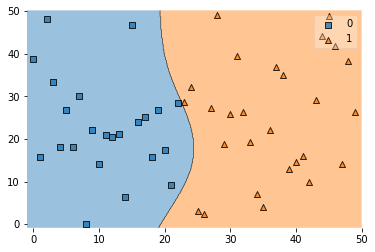

In [ ]:
plot_decision_regions(X,y,clf=model)

Yaaha pr linear nhi hai kyuki kuch aur kernal use hua hai.

In [ ]:
#Lets make it linear kernal
model=SVC(kernel='linear')


In [ ]:
model.fit(X,y)

SVC(kernel='linear')

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


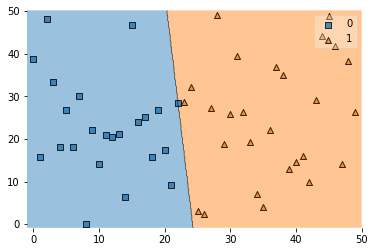

In [ ]:
plot_decision_regions(X,y,clf=model)

#I'm Not able to see support vector

#SVM FROM SCRATCH PRIMAL EQUATIONS

First We Need to separate dataset in +1 and -1.

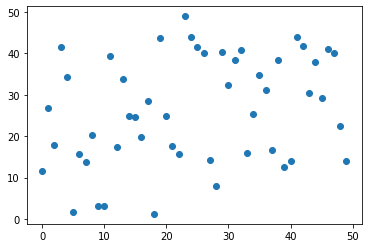

In [ ]:
x1=np.arange(50)
x2=np.random.rand(50)*50
plt.scatter(x1,x2)

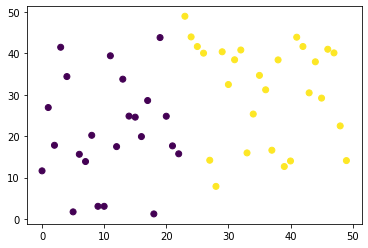

In [ ]:
y=np.where(x1+x1 <=45,-1,1)
plt.scatter(x1,x2,c=y)

In [ ]:
class SVM_sc:
  def __init__(self,iterations=1000,learning_rate=0.01,C=1000):
    self.iterations=iterations
    self.learning_rate=learning_rate
    self.C=C

  def fit(self,X,Y):
    n_samples,n_features = X.shape

    self.W = np.random.rand(n_features)
    self.b = np.random.rand()

    for _ in range(self.iterations):
        correct = (Y.T).dot((X.dot(self.W) + self.b))>=1
        if correct:
          self.W = self.W -self.learning_rate*(self.W)
        else:
          self.W = self.W - self.learning_rate*(self.W - self.C*(X.T).dot(Y))  
          self.b = self.b - self.learning_rate*((-1)*self.C*y)

  def predict(self,X):
    distance = X.dot(self.W)+self.b
    return np.sign(distance)
    




In [ ]:
print(y)

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1]


In [ ]:
model = SVM_sc()

In [ ]:
model.fit(X,y)

In [ ]:
model.predict(X)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

Kahi Pr Wrong Hai Sabhi ko 1 kr derha.

##Internally SVM Implement Dual Form not Primal Form.

In [ ]:
from sklearn.datasets import make_circles

X,y = make_circles()

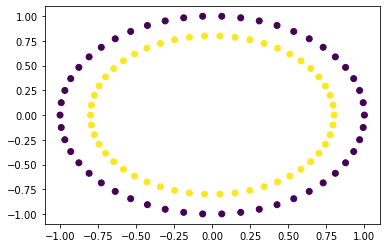

In [ ]:
plt.scatter(X[:,0],X[:,1],c=y)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


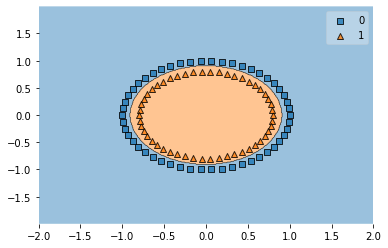

In [ ]:
from sklearn.svm import SVC
model = SVC(kernel = 'poly',degree=2)
model.fit(X,y)
#plt.scatter(X[:,0],X[:,1],c=y)
plot_decision_regions(X,y,clf=model)